In [1]:
## California House Price predicion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import the dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/1553768847-housing.csv')

In [4]:
# to predict median house values in California, 'median_house_value'
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
# to check if variables are in the correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
# to check for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
# to check % missing values
100*df.isnull().sum()/len(df)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

In [8]:
# to remove missing values, only 1% missing values in bedrooms
df = df.dropna()

In [9]:
# to check for duplicated values
duplicates = df[df.duplicated()]

In [10]:
# there are no duplicated values
duplicates

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


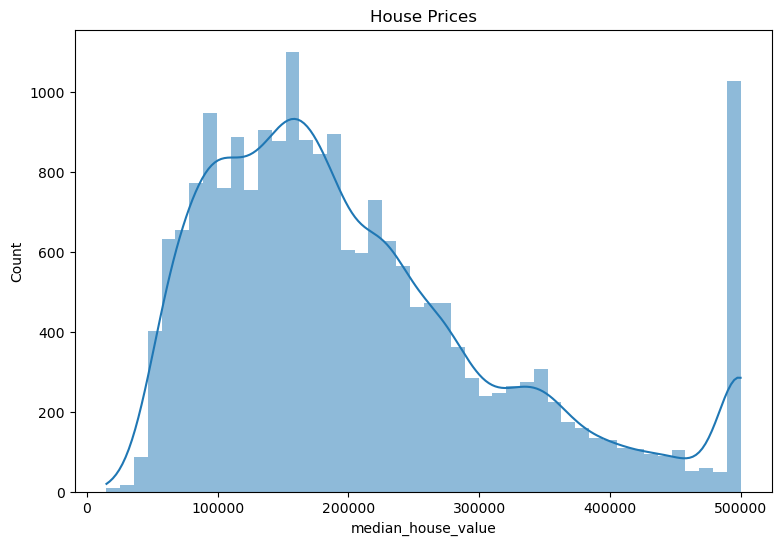

In [12]:
# to visualise the distribution of 'median_house_value'
plt.figure(figsize=(9,6), dpi=100)
sns.histplot(data=df, x='median_house_value', kde=True, edgecolor=None)
plt.title('House Prices');

In [13]:
# to see numeric variables in dataset
df.select_dtypes(['int','float'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [14]:
df.select_dtypes(['int','float']).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


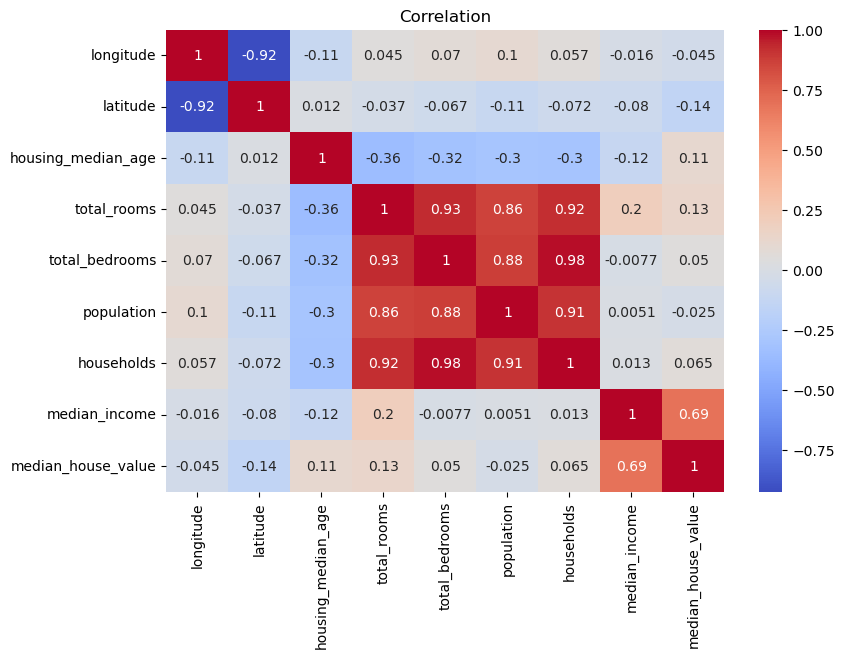

In [15]:
# to visualise columns in a heatmap
plt.figure(figsize=(9,6),dpi=100)
sns.heatmap(df.select_dtypes(['int','float']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation');

In [16]:
# to see all correlation against target variable,'median_house_value'
# 'median_income' is highly correlated with house value
df.select_dtypes(['int','float']).corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

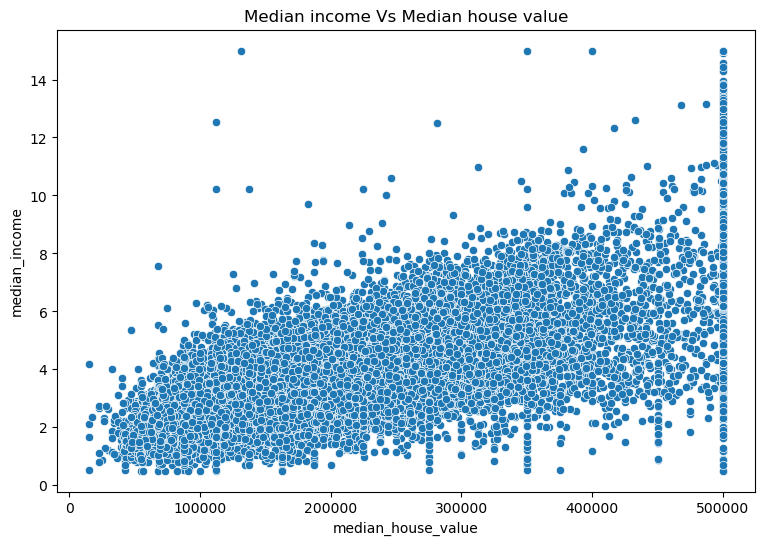

In [17]:
# to visualise 'median_income' & 'median_house_value' in a scatterplot
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df, y='median_income', x='median_house_value')
plt.title('Median income Vs Median house value');

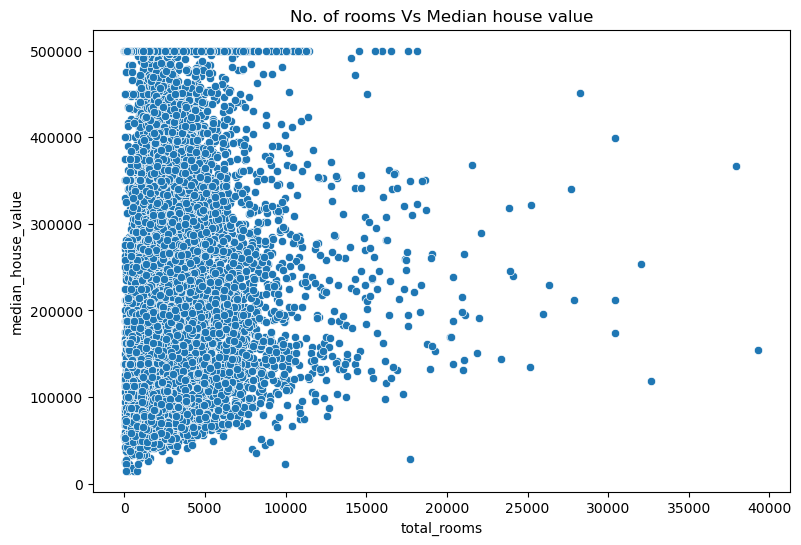

In [18]:
# to visualise 'total_rooms' & 'median_house_value' in a scatterplot
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df, x='total_rooms', y='median_house_value')
plt.title('No. of rooms Vs Median house value');

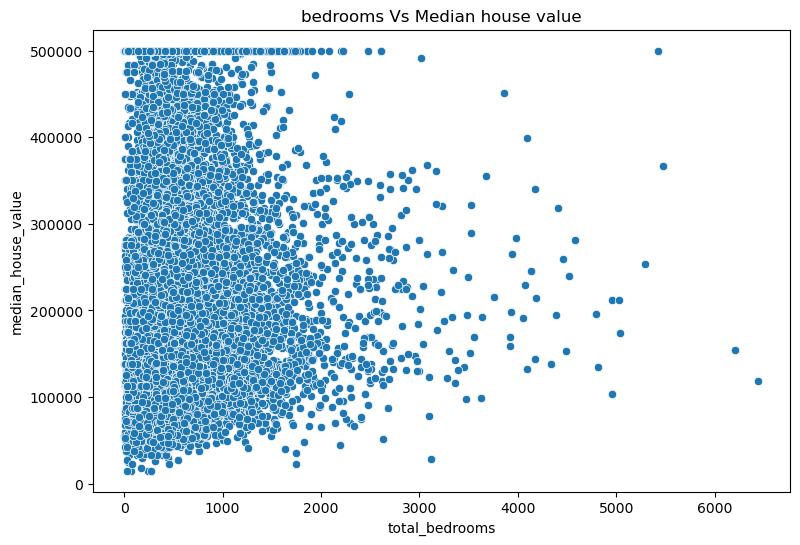

In [19]:
# to visualise 'total_rooms' & 'median_house_value' in a scatterplot
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df, x='total_bedrooms', y='median_house_value')
plt.title('bedrooms Vs Median house value');

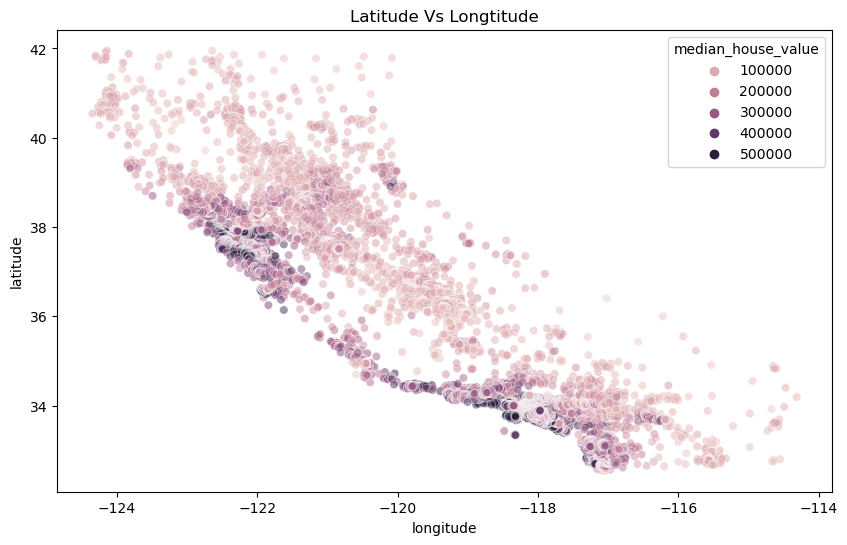

In [20]:
# Seems like the more expensive houses are located at the lower Latitude
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', alpha=0.5)
plt.title('Latitude Vs Longtitude');

In [21]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

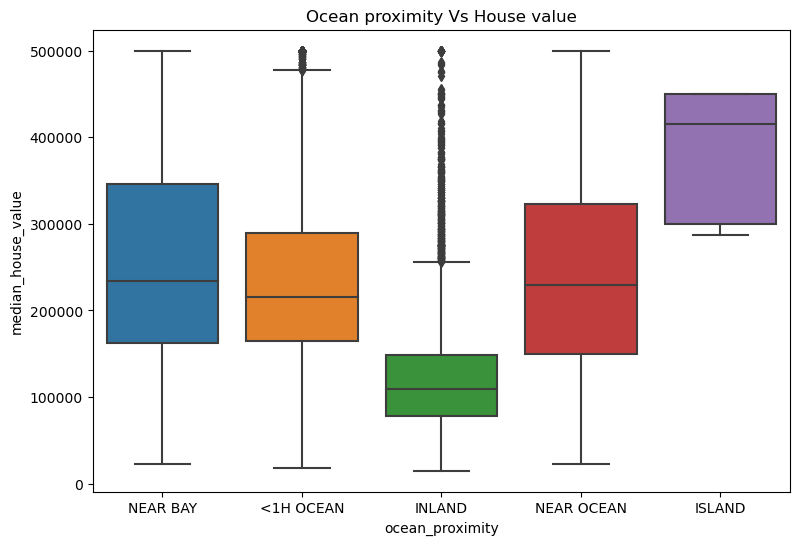

In [22]:
# for houses located near island, House value is much higher.
plt.figure(figsize=(9,6),dpi=100)
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')
plt.title('Ocean proximity Vs House value');

In [23]:
# to map the categorical variable into numerics before ANN regression
df['ocean_proximity'] = df['ocean_proximity'].map({'INLAND':1,'<1H OCEAN':2, 'NEAR OCEAN':3, 'NEAR BAY':4, 'ISLAND':5})

In [24]:
df['ocean_proximity'].unique()

array([4, 2, 1, 3, 5], dtype=int64)

In [25]:
# to define X and y values for ANN regressor algorithms
X = df.drop('median_house_value', axis=1).values

In [26]:
y = df['median_house_value'].values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# testing set = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [30]:
# to define the scaler
scaler = StandardScaler()

In [31]:
# scaled on the training set
X_train = scaler.fit_transform(X_train)

In [32]:
X_test = scaler.transform(X_test)

In [33]:
from tensorflow.keras.models import Sequential

In [34]:
from tensorflow.keras.layers import Dense

In [35]:
X_train.shape

(16346, 9)

In [36]:
# to create the ANN regression model
model = Sequential()

model.add(Dense(9,activation='relu')) # 9 neurons
model.add(Dense(9,activation='relu')) # 9 neurons
model.add(Dense(5,activation='relu')) # 9 neurons

model.add(Dense(1)) # Output layer, to predict the price of the house

model.compile(optimizer='adam', loss='mse')

In [37]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test),
                                 batch_size=128, epochs=350)

Epoch 1/350
128/128 [==============================] - 1s 4ms/step - loss: 55801765888.0000 - val_loss: 57378631680.0000
Epoch 2/350
128/128 [==============================] - 0s 3ms/step - loss: 55797538816.0000 - val_loss: 57368244224.0000
Epoch 3/350
128/128 [==============================] - 0s 2ms/step - loss: 55767445504.0000 - val_loss: 57306886144.0000
Epoch 4/350
128/128 [==============================] - 0s 2ms/step - loss: 55642025984.0000 - val_loss: 57097273344.0000
Epoch 5/350
128/128 [==============================] - 0s 2ms/step - loss: 55305244672.0000 - val_loss: 56608354304.0000
Epoch 6/350
128/128 [==============================] - 0s 2ms/step - loss: 54625202176.0000 - val_loss: 55707770880.0000
Epoch 7/350
128/128 [==============================] - 0s 3ms/step - loss: 53474856960.0000 - val_loss: 54275346432.0000
Epoch 8/350
128/128 [==============================] - 0s 2ms/step - loss: 51758116864.0000 - val_loss: 52226895872.0000
Epoch 9/350
128/128 [===========

Epoch 69/350
128/128 [==============================] - 0s 3ms/step - loss: 5032164352.0000 - val_loss: 5374285312.0000
Epoch 70/350
128/128 [==============================] - 0s 3ms/step - loss: 4997907968.0000 - val_loss: 5339686400.0000
Epoch 71/350
128/128 [==============================] - 0s 3ms/step - loss: 4965470720.0000 - val_loss: 5306124800.0000
Epoch 72/350
128/128 [==============================] - 0s 3ms/step - loss: 4934611456.0000 - val_loss: 5274056704.0000
Epoch 73/350
128/128 [==============================] - 0s 3ms/step - loss: 4905097728.0000 - val_loss: 5244163584.0000
Epoch 74/350
128/128 [==============================] - 0s 4ms/step - loss: 4877680640.0000 - val_loss: 5217700352.0000
Epoch 75/350
128/128 [==============================] - 0s 3ms/step - loss: 4851566592.0000 - val_loss: 5189553664.0000
Epoch 76/350
128/128 [==============================] - 0s 3ms/step - loss: 4827733504.0000 - val_loss: 5167135232.0000
Epoch 77/350
128/128 [==================

Epoch 137/350
128/128 [==============================] - 0s 3ms/step - loss: 4437526016.0000 - val_loss: 4715060224.0000
Epoch 138/350
128/128 [==============================] - 0s 3ms/step - loss: 4434969088.0000 - val_loss: 4713264128.0000
Epoch 139/350
128/128 [==============================] - 0s 3ms/step - loss: 4432907264.0000 - val_loss: 4711785472.0000
Epoch 140/350
128/128 [==============================] - 0s 3ms/step - loss: 4430821376.0000 - val_loss: 4708749824.0000
Epoch 141/350
128/128 [==============================] - 0s 3ms/step - loss: 4429131776.0000 - val_loss: 4703840768.0000
Epoch 142/350
128/128 [==============================] - 0s 4ms/step - loss: 4427259392.0000 - val_loss: 4701219328.0000
Epoch 143/350
128/128 [==============================] - 1s 4ms/step - loss: 4424474624.0000 - val_loss: 4699074560.0000
Epoch 144/350
128/128 [==============================] - 0s 3ms/step - loss: 4422657536.0000 - val_loss: 4696336384.0000
Epoch 145/350
128/128 [=========

128/128 [==============================] - 0s 3ms/step - loss: 4330404864.0000 - val_loss: 4583405568.0000
Epoch 205/350
128/128 [==============================] - 0s 3ms/step - loss: 4329514496.0000 - val_loss: 4578819584.0000
Epoch 206/350
128/128 [==============================] - 0s 3ms/step - loss: 4329048064.0000 - val_loss: 4577825792.0000
Epoch 207/350
128/128 [==============================] - 0s 3ms/step - loss: 4325812736.0000 - val_loss: 4579039232.0000
Epoch 208/350
128/128 [==============================] - 0s 3ms/step - loss: 4325567488.0000 - val_loss: 4577148928.0000
Epoch 209/350
128/128 [==============================] - 0s 3ms/step - loss: 4324033536.0000 - val_loss: 4576257536.0000
Epoch 210/350
128/128 [==============================] - 0s 3ms/step - loss: 4323222528.0000 - val_loss: 4573950976.0000
Epoch 211/350
128/128 [==============================] - 0s 3ms/step - loss: 4322476032.0000 - val_loss: 4573190144.0000
Epoch 212/350
128/128 [=======================

Epoch 272/350
128/128 [==============================] - 0s 3ms/step - loss: 4262883328.0000 - val_loss: 4504537600.0000
Epoch 273/350
128/128 [==============================] - 0s 3ms/step - loss: 4262383616.0000 - val_loss: 4500590592.0000
Epoch 274/350
128/128 [==============================] - 0s 3ms/step - loss: 4261638144.0000 - val_loss: 4502397952.0000
Epoch 275/350
128/128 [==============================] - 0s 3ms/step - loss: 4260432640.0000 - val_loss: 4501006848.0000
Epoch 276/350
128/128 [==============================] - 0s 3ms/step - loss: 4259215360.0000 - val_loss: 4500530688.0000
Epoch 277/350
128/128 [==============================] - 0s 3ms/step - loss: 4259585792.0000 - val_loss: 4500660736.0000
Epoch 278/350
128/128 [==============================] - 0s 3ms/step - loss: 4257964288.0000 - val_loss: 4497666048.0000
Epoch 279/350
128/128 [==============================] - 0s 3ms/step - loss: 4257667584.0000 - val_loss: 4497205248.0000
Epoch 280/350
128/128 [=========

128/128 [==============================] - 0s 3ms/step - loss: 4219788288.0000 - val_loss: 4451354624.0000
Epoch 340/350
128/128 [==============================] - 0s 4ms/step - loss: 4219178496.0000 - val_loss: 4451240960.0000
Epoch 341/350
128/128 [==============================] - 0s 3ms/step - loss: 4218513664.0000 - val_loss: 4451676160.0000
Epoch 342/350
128/128 [==============================] - 0s 3ms/step - loss: 4217575936.0000 - val_loss: 4449994240.0000
Epoch 343/350
128/128 [==============================] - 0s 3ms/step - loss: 4217079040.0000 - val_loss: 4448322048.0000
Epoch 344/350
128/128 [==============================] - 0s 3ms/step - loss: 4216847360.0000 - val_loss: 4449045504.0000
Epoch 345/350
128/128 [==============================] - 0s 3ms/step - loss: 4216320256.0000 - val_loss: 4447176192.0000
Epoch 346/350
128/128 [==============================] - 0s 3ms/step - loss: 4215719424.0000 - val_loss: 4447475712.0000
Epoch 347/350
128/128 [=======================

In [38]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,5.580177e+10,5.737863e+10
1,5.579754e+10,5.736824e+10
2,5.576745e+10,5.730689e+10
3,5.564203e+10,5.709727e+10
4,5.530524e+10,5.660835e+10
...,...,...
345,4.215719e+09,4.447476e+09
346,4.215392e+09,4.446742e+09
347,4.214755e+09,4.446435e+09
348,4.214360e+09,4.445273e+09


In [39]:
losses = pd.DataFrame(model.history.history)

<Axes: >

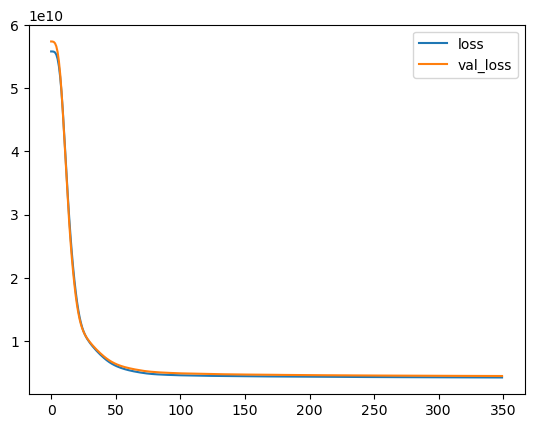

In [40]:
# both training and validation loss are closely aline
losses.plot()

In [41]:
# to import performance evaluation metrics for ANN regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [42]:
# to predict the house value on X test set
pred = model.predict(X_test)

128/128 [==============================] - 0s 2ms/step


In [43]:
mean_absolute_error(y_test,pred)

47246.376000695804

In [44]:
mean_squared_error(y_test,pred)

4445881101.778686

In [45]:
# to return the RMSE of the house
print('Root Mean Squared error :' ,np.sqrt(mean_squared_error(y_test,pred)))

Root Mean Squared error : 66677.44072607081


In [46]:
# Explanined variance score is similar to R^2 score, regression score function
# Best possible score = 1.0, means a good model
print('Explained variance score :' ,(explained_variance_score(y_test,pred)))

Explained variance score : 0.6758259084815226


In [47]:
# to see the house value from the original dataset, house value = $206,864
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
ocean_proximity,20433.0,2.033622,0.944472,1.0000,1.0000,2.0000,2.000,5.0000
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000


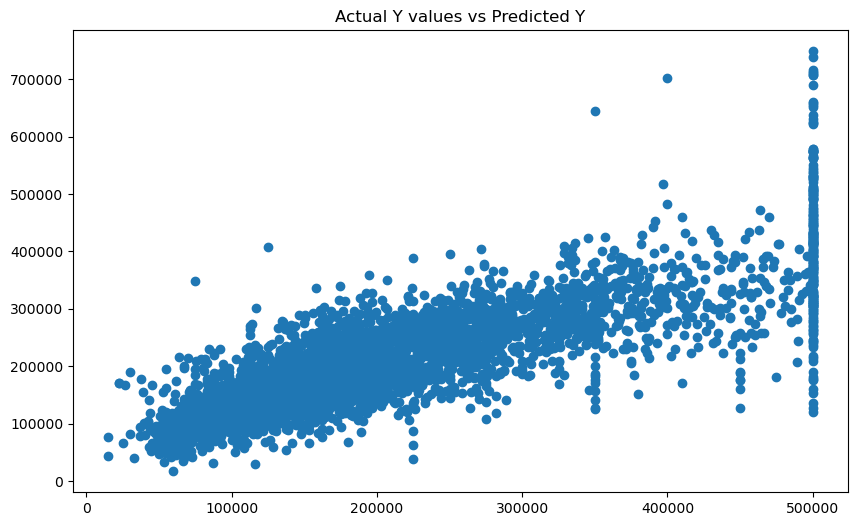

In [48]:
# there is some correlation between the actual Y and the predicted House values (y)
plt.figure(figsize=(10,6), dpi=100)
plt.scatter(y_test,pred)
plt.title('Actual Y values vs Predicted Y');

In [56]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,4,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,4,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,4,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,4,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,4,342200


In [50]:
# to use the ANN regression prediction model to predict on a brand new house
# iloc[0] to return the price of the first house
# features of a new house in the market
df.drop('median_house_value', axis=1).iloc[0]

longitude            -122.2300
latitude               37.8800
housing_median_age     41.0000
total_rooms           880.0000
total_bedrooms        129.0000
population            322.0000
households            126.0000
median_income           8.3252
ocean_proximity         4.0000
Name: 0, dtype: float64

In [51]:
# to assign to a new dataframe
single_house = df.drop('median_house_value', axis=1).iloc[0]

In [52]:
single_house = scaler.transform(single_house.values.reshape(-1,9))

In [53]:
# to double-check on the accuracy rate of the ANN regression model that predicts the housing price
model.predict(single_house)

1/1 [==============================] - 0s 16ms/step


array([[423045.56]], dtype=float32)

In [54]:
# predicted price of the first house = $423,045
# actual price of first house = $452,600  
# the ANN prediction is 6.53% way off
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,4,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,4,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,4,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,4,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,4,342200
